In [47]:
### IMPORT LIBRARIES ###

# IMPORT SCIENTIFIC LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'], plt.rcParams['axes.labelsize'] = 14, 18
import pandas as pd
import seaborn as sns

# IMPORT CUSTOM LIBRARIES
from IN8_read_data import read_IN8scan, gen_data_df
from functions import *

# Monocrhomator flux experiment
## Data import

In [48]:
### IMPORT FLUX DATA ###
flux_folder = './data/ReactorFlux_data/'

files = {
        'PG': '030082_PG_good',
        'Cu200': '030092_311_good',
        'Si111': '030094_111_good',
        'Cu200': '030096_Cu_good',
        }

data = {}
for key in files.keys():
    data[key] = read_IN8scan(files[key], flux_folder)
    data[key]['data']['lambdaI'] = 2*np.pi/data[key]['data'].KI
    data[key]['data']['EI'] = 81.8/data[key]['data'].lambdaI**2

## **Monocrhomator Cu(200)**
Working in this configuration, by definition, we work at energy $E$ or wavelength $\lambda$. The other armonichs are therefore:
$$
\lambda , \hspace{0.5cm} \lambda/2, \hspace{0.5cm} \lambda/3 , \hspace{0.5cm} ...
$$
$$
E, \hspace{0.5cm} 4E, \hspace{0.5cm} 9E , \hspace{0.5cm} ...
$$

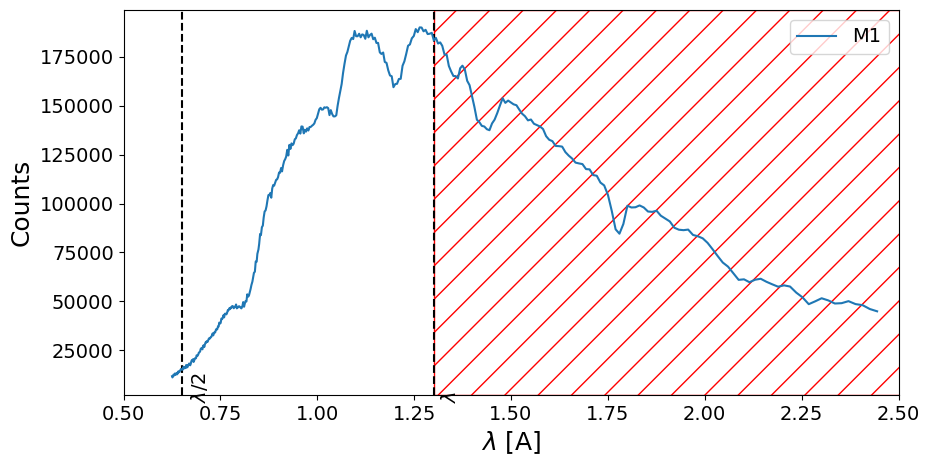

In [49]:
# Detectort efficiency
Eff_l = lambda l: l/np.sqrt(81.80)
Eff_E = lambda E: 1/np.sqrt(E)
#lambda
plt.figure(figsize=(10, 5))
plt.errorbar(data['Cu200']['data'].lambdaI, Eff_l(data['Cu200']['data'].lambdaI)**-1*data['Cu200']['data'].M1, label='M1')

plt.xlabel('$\\lambda$ [A]')
plt.ylabel('Counts')
plt.legend()
plt.xlim(.5, 2.5)

# vertical lines
lLim_Cu = 1.3
plt.axvline(lLim_Cu, color='k', linestyle='--')
plt.text(lLim_Cu+.02, 0, str('$\\lambda$'), rotation=90)
plt.axvline(lLim_Cu/2, color='k', linestyle='--')
plt.text(lLim_Cu/2+.02, 0, str('$\\lambda/2$'), rotation=90)

# red vertical area
plt.axvspan(lLim_Cu, 3, hatch='/', edgecolor="red", facecolor="none")

Lo stesso grafico lo possiamo rivedere in energia.

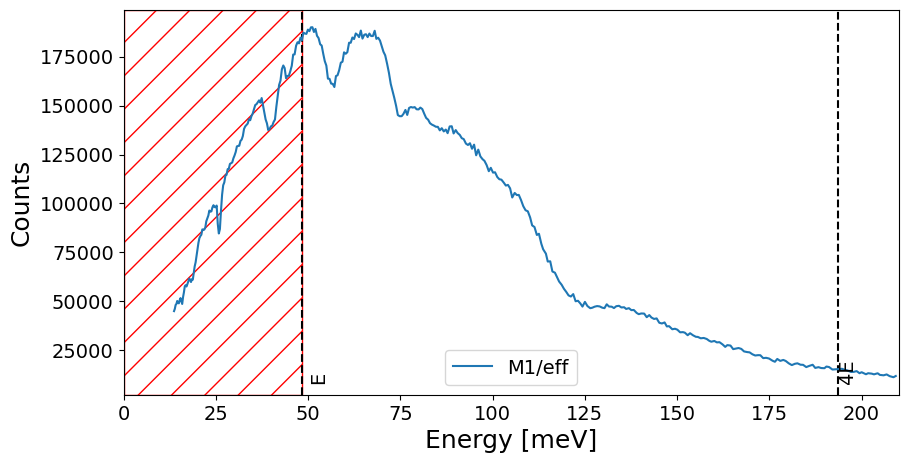

In [50]:
# Energy
plt.figure(figsize=(10, 5))
plt.errorbar(data['Cu200']['data'].EI, Eff_E(data['Cu200']['data'].EI)**-1*data['Cu200']['data'].M1, label='M1/eff')

plt.legend()
plt.xlabel('Energy [meV]')
plt.ylabel('Counts')
plt.xlim(0, 210)

# vertical lines
ELim_Cu = l2E(lLim_Cu)
plt.axvline(ELim_Cu, color='k', linestyle='--')
plt.text(ELim_Cu+2, 1e4, str('E'), rotation=90)
plt.axvline(ELim_Cu*4, color='k', linestyle='--')
plt.text(ELim_Cu*4, 1e4, str('4E'), rotation=90)

# red vertical area
plt.axvspan(0, ELim_Cu, hatch='/', edgecolor="red", facecolor="none")

## **Configuration: Cu(200) - Cu(400)** $K_f = 5.8 \AA^{-1}$, $E_f = 69.7meV$
$$
2\lambda , \hspace{0.5cm}  \lambda,\hspace{0.5cm} \frac{2}{3}\lambda, \hspace{0.5cm} ...
$$
$$
\frac{E}{4}, \hspace{0.5cm} E, \hspace{0.5cm} \frac{9}{4}E, \hspace{0.5cm} ...
$$

Ef = 69.7 meV
k_f = 5.799887979509778


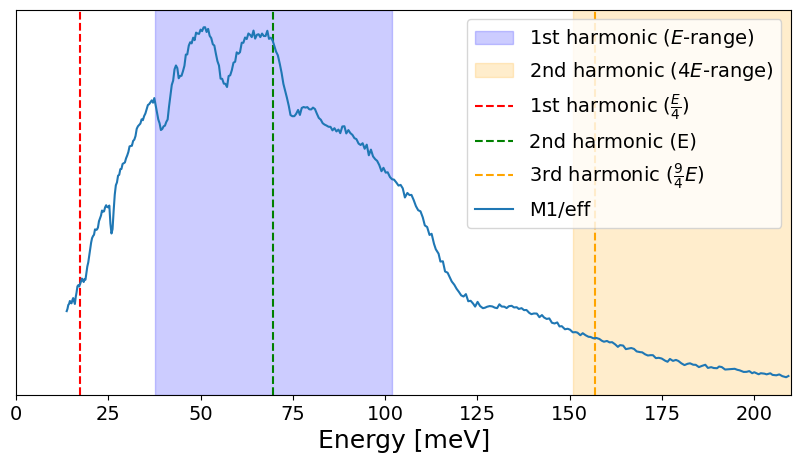

In [51]:
######################
Ef = 69.7
dE_range = 325f
######################

print('Ef =', Ef, 'meV')
print('k_f =', E2k(Ef))

# Energy
plt.figure(figsize=(10, 5))
plt.errorbar(data['Cu200']['data'].EI, Eff_E(data['Cu200']['data'].EI)**-1*data['Cu200']['data'].M1, label='M1/eff')
plt.legend()
plt.xlabel('Energy [meV]')
#plt.ylabel('Counts')
plt.yticks([])
plt.xlim(0, 210)

# E-range
plt.axvspan(Ef-dE_range, Ef+dE_range, alpha=0.2, color='blue', label='1st harmonic ($E$-range)')
plt.axvspan((Ef-dE_range)*4, (Ef+dE_range)*4, alpha=0.2, color='orange', label=r'2nd harmonic ($4E$-range)')

# E analizer
plt.axvline(Ef/4, color='r', linestyle='--', label=r'1st harmonic ($\frac{E}{4}$)')
plt.axvline(Ef, color='g', linestyle='--', label=r'2nd harmonic (E)')
plt.axvline(Ef*9/4, color='orange', linestyle='--', label=r'3rd harmonic ($\frac{9}{4}E$)')

plt.legend()

## **Configuration: Cu(200) - Cu(400)** $K_f = 4.9 \AA^{-1}$, $E_f = 50meV$

Ef = 50 meV
k_f = 4.91233774341229


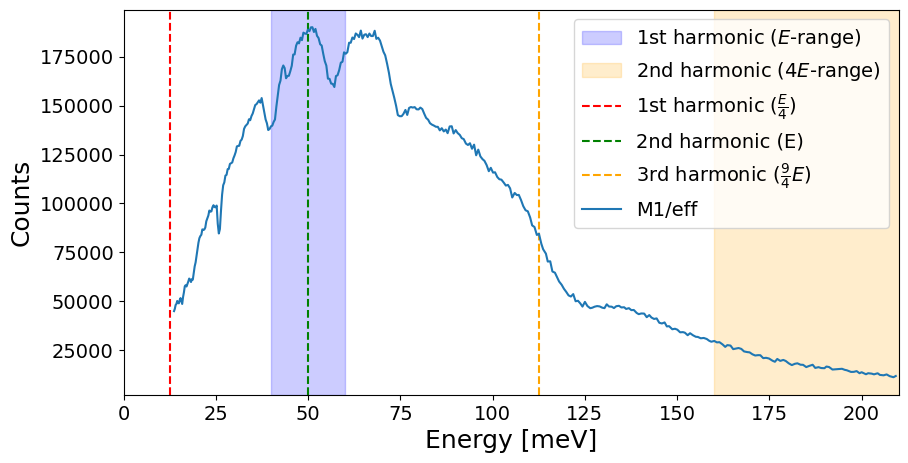

In [52]:
######################
Ef = 50
dE_range = 10
######################

print('Ef =', Ef, 'meV')
print('k_f =', E2k(Ef))

# Energy
plt.figure(figsize=(10, 5))
plt.errorbar(data['Cu200']['data'].EI, Eff_E(data['Cu200']['data'].EI)**-1*data['Cu200']['data'].M1, label='M1/eff')
plt.legend()
plt.xlabel('Energy [meV]')
plt.ylabel('Counts')
plt.xlim(0, 210)

# E-range
plt.axvspan(Ef-dE_range, Ef+dE_range, alpha=0.2, color='blue', label='1st harmonic ($E$-range)')
plt.axvspan((Ef-dE_range)*4, (Ef+dE_range)*4, alpha=0.2, color='orange', label=r'2nd harmonic ($4E$-range)')

# E analizer
plt.axvline(Ef/4, color='r', linestyle='--', label=r'1st harmonic ($\frac{E}{4}$)')
plt.axvline(Ef, color='g', linestyle='--', label=r'2nd harmonic (E)')
plt.axvline(Ef*9/4, color='orange', linestyle='--', label=r'3rd harmonic ($\frac{9}{4}E$)')

plt.legend()

# Dynamic range
From the momentum and energy conservation
$$
\begin{aligned}
\vec{Q} = \vec{k}_i - \vec{k}_f \\
\omega = \omega_i - \omega_f
\end{aligned}
$$
and the vectorial relation
$$
|\vec{k}_i - \vec{k}_f| = \sqrt{k_i^2 + k_f^2 - 2 k_i k_f \cos \theta}
$$
we can derive the dynamic range
$$
Q = k_f \sqrt{2 + \frac{\omega}{E_f} - 2\sqrt{1 + \frac{\omega}{E_f}}\cos\theta} \hspace{1cm} k_f=2\pi\sqrt{\frac{E_f}{81.80}}
$$
In our case the role played by the scattering angle $\theta$ is to limit the dynamic range because of the direct beam contribution. In the experiment this angle is limited to $\theta > 1^\circ$.


In [53]:
Q = lambda omega, theta, Ef: 2*np.pi*np.sqrt(Ef/81.80) * np.sqrt(2 + omega/Ef - 2*np.sqrt(1 + omega/Ef)*np.cos(theta))

In [54]:
data_L = np.array([  [2.022116903633491, 4.538152610441767],
            [3.0331753554502368, 6.78714859437751],
            [3.993680884676145, 8.875502008032129],
            [5.004739336492891, 11.04417670682731],
            [6.015797788309636, 12.771084337349398],
            [7.001579778830964, 15.02008032128514],
            [7.98736176935229, 16.06425702811245],
            [8.998420221169036, 16.746987951807228],
            [10.06003159557662, 17.550200803212853],
            [10.96998420221169, 14.216867469879517],
            [11.981042654028435, 13.293172690763052],
            [14.003159557661927, 12.650602409638553],
            [14.988941548183254, 13.132530120481928]])


data_T = np.array([[6.976303317535545, 8.393574297188755],
        [7.962085308056872, 8.55421686746988],
        [8.92259083728278, 8.594377510040161],
        [9.908372827804108, 9.076305220883533],
        [10.96998420221169, 8.473895582329318],
        [12.056872037914692, 7.991967871485944],
        [13.95260663507109, 8.594377510040161],
        [15.06477093206951, 8.91566265060241]])

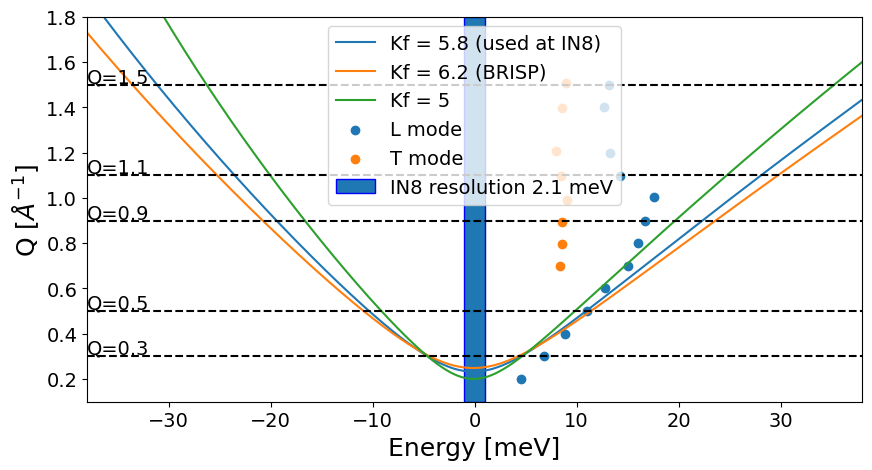

In [55]:


plt.figure(figsize=(10, 5))
X = np.arange (-50, 50, 0.01)

plt.plot(X, Q(X, np.deg2rad(2.3), k2E(5.8)), label='Kf = 5.8 (used at IN8)')
plt.plot(X, Q(X, np.deg2rad(2.3), k2E(6.2)), label='Kf = 6.2 (BRISP)')
plt.plot(X, Q(X, np.deg2rad(2.3), k2E(5)), label='Kf = 5')

plt.scatter(data_L[:,1], data_L[:,0]/10, label='L mode')
plt.scatter(data_T[:,1], data_T[:,0]/10, label='T mode')

plt.axvspan(-1.05, 1.05, edgecolor="b",  label='IN8 resolution 2.1 meV')

Qs = [.3, .5, .9, 1.1, 1.5]
for q in Qs:
    plt.axhline(q, color='black', linestyle='--')
    plt.text(-38, q+0.01, 'Q='+str(q), color='black')


plt.xlabel('Energy [meV]')
plt.ylabel('Q [$\\AA^{-1}$]')
plt.xlim(-38,38)
plt.ylim(0.1, 1.8)
plt.legend()

## Accessible region for MS

/tmp/ipykernel_32182/1750150435.py:8: RuntimeWarning: invalid value encountered in sqrt
  Q = ki * np.sqrt(2-omega/Ei - 2*np.sqrt(1-omega/Ei)*np.cos(np.deg2rad(theta)))


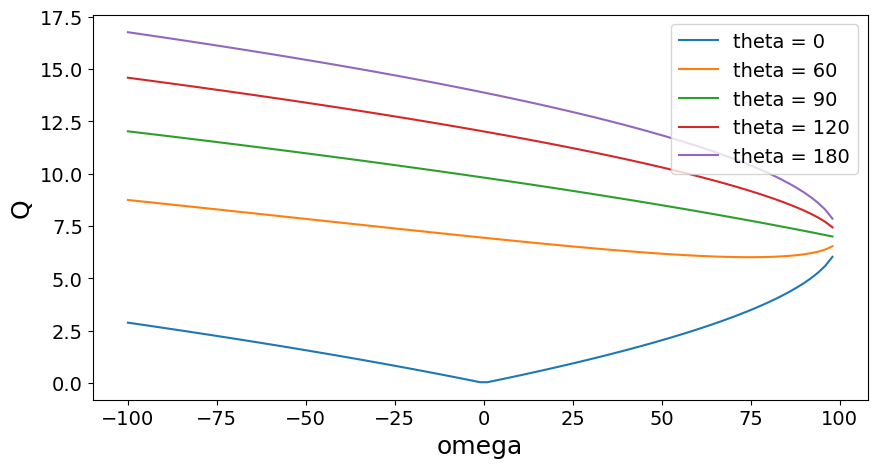

In [56]:
omega= np.linspace(-100,100,100)

Ei = k2E(5.8) + 30  #maximum working energy
ki = E2k(Ei)

plt.figure(figsize=(10, 5))
for theta in (0,60,90,120,180):
    Q = ki * np.sqrt(2-omega/Ei - 2*np.sqrt(1-omega/Ei)*np.cos(np.deg2rad(theta)))
    plt.plot(omega,Q, label = 'theta = '+str(theta))


plt.xlabel('omega')
plt.ylabel('Q')
plt.legend()

plt.show()

# Attenation measurements (Boral)
Here follow the notes on the tablet. The quantity of interest is mainly M1, but we also have M2 and CNTS. **For now we focuse on the first!** **Note that we are concerned with the measurement time, therefore we are assuming that the reactor is stable!** These are the data:

In [57]:
### IMPORT Boral Attenuation (Sasha) DATA ###
flux_folder = 'data/BoralAttenuator_data/'

folders = {'Cu': 'mono Cu/', 'Si111': 'mono Si111/', 'PG': 'mono PG/', 'Si311': 'mono Si311/'}

files = {'Cu': {0: '035069', 1: '035081', 2: '035085'},
         'Si111': {0: '035071', 1: '035082', 2: '035097'},
         'PG': {0: '035068', 1: '035080', 2: '035084'},
         'Si311': {0: '035072', 1: '035083'}
        }

data = {'Cu':{}, 'Si111':{}, 'PG':{}, 'Si311':{}}
for key in files.keys():
    for i in files[key].keys():
        data[key][i] = read_IN8scan(folders[key]+files[key][i], flux_folder)
        data[key][i]['data']['lambdaI'] = 2*np.pi/data[key][i]['data'].KI
        data[key][i]['data']['EI'] = 81.8/data[key][i]['data'].lambdaI**2
        data[key][i]['data']['I_M1'] = data[key][i]['data'].M1/data[key][i]['data'].TIME
        data[key][i]['data']['I_M2'] = data[key][i]['data'].M2/data[key][i]['data'].TIME
        data[key][i]['data']['I_CNTS'] = data[key][i]['data'].CNTS/data[key][i]['data'].TIME
        data[key][i]['data']['dI_M1'] = np.sqrt(data[key][i]['data'].M1)/data[key][i]['data'].TIME
        data[key][i]['data']['dI_M2'] = np.sqrt(data[key][i]['data'].M2)/data[key][i]['data'].TIME
        data[key][i]['data']['dI_CNTS'] = np.sqrt(data[key][i]['data'].CNTS)/data[key][i]['data'].TIME

The measurements are taken using the first harmonic of the crystal, fulfilling the brag law $\lambda = 2d\sin\theta$.

Text(0, 0.5, 'A2 [deg]')

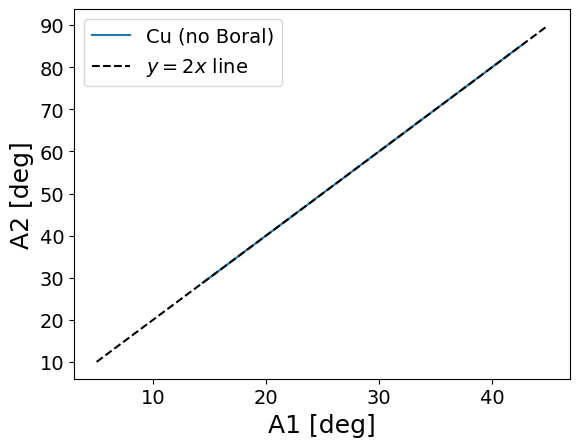

In [58]:
plt.plot(data['Cu'][0]['data'].A1, data['Cu'][0]['data'].A2, label='Cu (no Boral)')

X = np.arange(5, 45, 0.1)
plt.plot(X, 2*X, 'k--', label=r'$y=2x$ line')

plt.legend()
plt.xlabel('A1 [deg]')
plt.ylabel('A2 [deg]')

**For each monocrhomator we have a scan in energy for three different configurations: without attenuators, with 1 Boral plate and with 2 Boral plates.**

Boral feature a neutron cross section with a $1/v$ behaviour, i.e. we can write
$$
\sigma(v) = \sigma_o\frac{v_o}{v} \hspace{1cm} \sigma_o = \sigma(v_o)
$$
As we are not interested in the neutron speed, than we have:
$$
\sigma = \sigma_o \frac{E_o}{E} = \sigma_o \frac{\lambda}{\lambda_o}
$$

Then the trasmission can be derived from the Bears law:
$$
\mu = n \sigma \implies \mu = \mu_o \frac{\lambda}{\lambda_o} = \mu_o \sqrt{\frac{E_o}{E}}
$$
$$
T = e^{-\mu d} = e^{-\mu_o d \sqrt{\frac{E_o}{E}}}= e^{-\mu_o d \frac{\lambda}{\lambda_o}}
$$

Therefore, plotting the $I_o/I_{Boral}$ ($I_o$ is the intensity without attenuators, $I_{Boral}$ is the intensity with attenuators) we should obtain a straight line with slope $-\mu_o d$ in ylog scale. This is both true for the measured intensity at the monitor M1, M2 and CNTS, and the "true" intensity after the Boral plate as the efficiencies and Debye-Waller factors of the different detectors cancel out. **This is true up to when we are dealing with just one wavelenght in the system!**

###########################################
Lim Cu:  1.4 A,  41.73469387755102 meV 4.487989505128276 A-1
###########################################


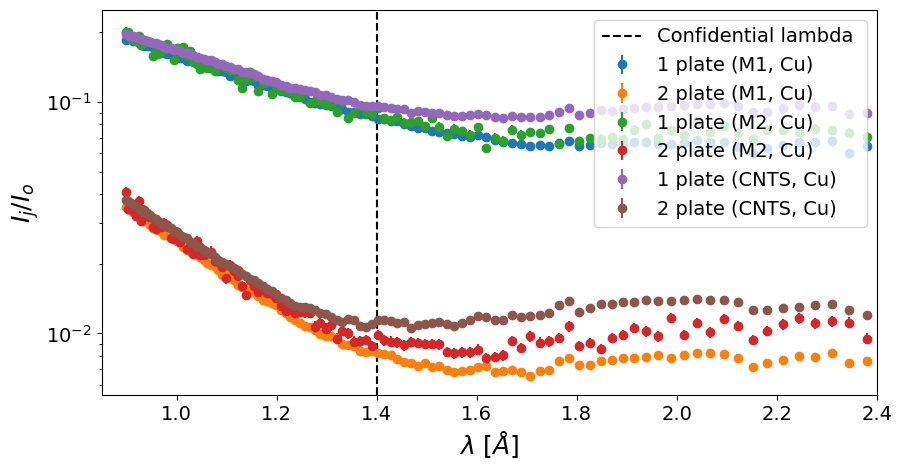

In [59]:
d0 = data['Cu'][0]['data']
d1 = data['Cu'][1]['data']
d2 = data['Cu'][2]['data']

plt.figure(figsize=(10,5))
plt.errorbar(d0.lambdaI, d1.I_M1/d0.I_M1, yerr=d1.I_M1/d0.I_M1*np.sqrt((d1.dI_M1/d1.I_M1)**2+(d0.dI_M1/d0.I_M1)**2), fmt='o', label='1 plate (M1, Cu)')
plt.errorbar(d0.lambdaI, d2.I_M1/d0.I_M1, yerr=d2.I_M1/d0.I_M1*np.sqrt((d2.dI_M1/d2.I_M1)**2+(d0.dI_M1/d0.I_M1)**2), fmt='o', label='2 plate (M1, Cu)')
plt.errorbar(d0.lambdaI, d1.I_M2/d0.I_M2, yerr=d1.I_M2/d0.I_M2*np.sqrt((d1.dI_M2/d1.I_M2)**2+(d0.dI_M2/d0.I_M2)**2), fmt='o', label='1 plate (M2, Cu)')
plt.errorbar(d0.lambdaI, d2.I_M2/d0.I_M2, yerr=d2.I_M2/d0.I_M2*np.sqrt((d2.dI_M2/d2.I_M2)**2+(d0.dI_M2/d0.I_M2)**2), fmt='o', label='2 plate (M2, Cu)')
plt.errorbar(d0.lambdaI, d1.I_CNTS/d0.I_CNTS, yerr=d1.I_CNTS/d0.I_CNTS*np.sqrt((d1.dI_CNTS/d1.I_CNTS)**2+(d0.dI_CNTS/d0.I_CNTS)**2), fmt='o', label='1 plate (CNTS, Cu)')
plt.errorbar(d0.lambdaI, d2.I_CNTS/d0.I_CNTS, yerr=d2.I_CNTS/d0.I_CNTS*np.sqrt((d2.dI_CNTS/d2.I_CNTS)**2+(d0.dI_CNTS/d0.I_CNTS)**2), fmt='o', label='2 plate (CNTS, Cu)')

lLim_Cu = 1.4
plt.axvline(lLim_Cu, color='k', linestyle='--', label='Confidential lambda ')

plt.xlabel(r'$\lambda$ [$\AA$]')
plt.ylabel(r'$I_j/I_o$')
plt.legend()
plt.xlim(.85,2.4)

plt.yscale('log')

print('###########################################')
print('Lim Cu: ', lLim_Cu, 'A, ', l2E(lLim_Cu), 'meV', l2k(lLim_Cu), 'A-1')
print('###########################################')